In [50]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow import keras
import keras.backend as K
import matplotlib.pyplot as plt
print(tf.__version__)
print(keras.__version__)

2.9.1
2.9.0


In [51]:
def Get_level(x):
    if x>=6:
        return 'pos'
    else:
        return 'neg'

In [52]:
import os
print(os.getcwd())
path = os.path.abspath('.')

D:\jupyter_Notebook


In [53]:
data_movies=pd.read_excel('./movie reviews.xlsx', engine='openpyxl')
data_movies.dropna()  
data_movies['rate']=data_movies.apply(lambda x:Get_level(x[6]),axis=1)  
	#根据电影评分来对电影进行评价，x[6]表示电影评分在数据集中的位置
X=data_movies.drop(['rate'],axis=1)  
Y=data_movies['rate']  	
x_train,x_test,y_train,y_test=train_test_split(X,Y,train_size=0.8)  #划分测试集和训练集

In [54]:
text=[]  
for i in data_movies['review']:  
    a=str(i)  
    text.append(a.rstrip('\n').rstrip('\r'))  #去掉文本中的换行符和制表符，并提取出数据集中的文本

In [55]:
postext=[]  
for i in x_train['review']:  
    a=str(i)  
    postext.append(a.rstrip('\n').rstrip('\r'))  
y_numeric=[]  
for i in y_train:  
    if i=='pos':  
        y_numeric.append(1)  
    else:  
        y_numeric.append(0) 
	#获取训练数据 

In [56]:
y_test_numeric=[]  
for i in y_test:  
    if i=='pos':  
        y_test_numeric.append(1)  
    else:  
        y_test_numeric.append(0)  
test_postext=[]  
for i in x_test['review']:  
    a=str(i)  
    test_postext.append(a.rstrip('\n').rstrip('\r'))  
	#获得测试数据

In [57]:
num_words=10000  #TextVectorization层的词汇表大小，如若训练数据中的词汇数量大于指定的词汇表的数量，则将出现次数小的单词抛弃。
max_length=80  
text_vectorization=keras.layers.experimental.preprocessing.TextVectorization(  max_tokens = num_words, output_sequence_length = max_length )
text_vectorization.adapt(text)   #调用adapt函数，将生成的TextVectorization应用到文本数据上
INPUT=keras.layers.Input(shape=[1],dtype='string')  #初始化深度学习网络输入层
Text=text_vectorization(INPUT)  
Embedding=keras.layers.Embedding(input_dim=num_words+1,output_dim=16)(Text) 
#通过Embedding函数将索引值转换为指定长度的稠密向量，向量长度由outout_dim参数指定 

## RNN

In [58]:
num_words=10000  #TextVectorization层的词汇表大小，如若训练数据中的词汇数量大于指定的词汇表的数量，则将出现次数小的单词抛弃。
max_length=80  #输出向量的维度：即映射到的向量空间的维度。	text_vectorization=keras.layers.experimental.preprocessing.TextVectorization(  max_tokens = num_words, output_sequence_length = max_length ) 
	#创建一个TextVectorization实例，矢量化文本原始字符串，将单词映射到整数索引上  

In [59]:
RNN=keras.layers.SimpleRNN(units=64,dropout=0.2,recurrent_dropout=0.2)(Embedding)  #建立RNN模型，units：输出空间的维度，dropout：丢弃比例，用于输入的线性变换 recurrent_dropout丢弃比例，用于循环层状态的线性转换
rnn_output=keras.layers.Dense(units=1,activation='sigmoid')(RNN) 
	#生成全连接层 
rnn_model=keras.Model(INPUT,rnn_output)  #建立模型

In [60]:
rnn_model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])  #模型编译，损失函数使用交叉熵，优化器设置为Adam

In [61]:
rnn_history=rnn_model.fit(tf.convert_to_tensor(postext),np.array(y_numeric),epochs=10,batch_size=512,validation_split=0.2,verbose=2)  #模型训练

Epoch 1/10
71/71 - 9s - loss: 0.6256 - accuracy: 0.6805 - val_loss: 0.5984 - val_accuracy: 0.7170 - 9s/epoch - 129ms/step
Epoch 2/10
71/71 - 8s - loss: 0.5982 - accuracy: 0.7209 - val_loss: 0.6005 - val_accuracy: 0.7170 - 8s/epoch - 115ms/step
Epoch 3/10
71/71 - 12s - loss: 0.5950 - accuracy: 0.7210 - val_loss: 0.5967 - val_accuracy: 0.7170 - 12s/epoch - 170ms/step
Epoch 4/10
71/71 - 13s - loss: 0.5938 - accuracy: 0.7210 - val_loss: 0.5960 - val_accuracy: 0.7170 - 13s/epoch - 179ms/step
Epoch 5/10
71/71 - 13s - loss: 0.5933 - accuracy: 0.7210 - val_loss: 0.5960 - val_accuracy: 0.7170 - 13s/epoch - 185ms/step
Epoch 6/10
71/71 - 13s - loss: 0.5922 - accuracy: 0.7210 - val_loss: 0.5961 - val_accuracy: 0.7170 - 13s/epoch - 189ms/step
Epoch 7/10
71/71 - 13s - loss: 0.5910 - accuracy: 0.7210 - val_loss: 0.5966 - val_accuracy: 0.7170 - 13s/epoch - 185ms/step
Epoch 8/10
71/71 - 14s - loss: 0.5893 - accuracy: 0.7210 - val_loss: 0.5955 - val_accuracy: 0.7170 - 14s/epoch - 193ms/step
Epoch 9/10
7

In [62]:
rnn_results=rnn_model.evaluate(tf.convert_to_tensor(test_postext),np.array(y_test_numeric),verbose=0)  #利用测试集数据进行模型评价

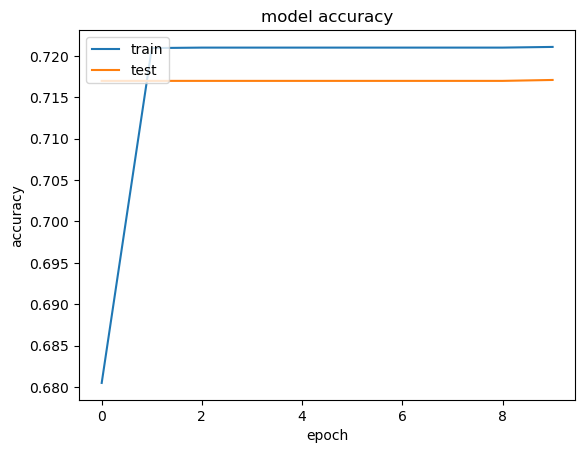

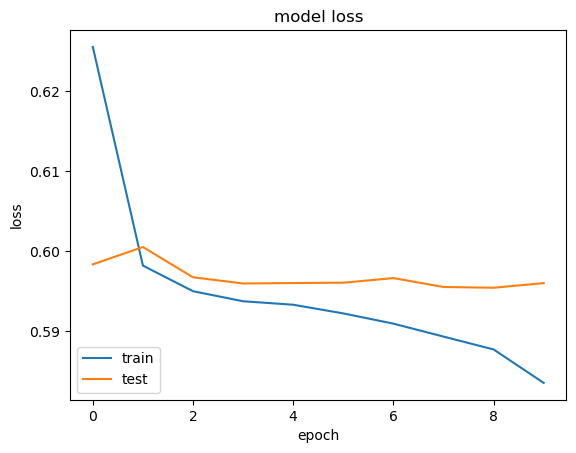

In [63]:
fig = plt.figure()  
plt.plot(rnn_history.history['accuracy'])  
plt.plot(rnn_history.history['val_accuracy'])  
plt.title('model accuracy')  
plt.ylabel('accuracy')  
plt.xlabel('epoch')  
plt.legend(['train', 'test'], loc='upper left')  
plt.show()  
plt.plot(rnn_history.history['loss'])  
plt.plot(rnn_history.history['val_loss'])  
plt.title('model loss')  
plt.ylabel('loss')  
plt.xlabel('epoch')  
plt.legend(['train', 'test'], loc='lower left')  
plt.show()

In [64]:
rnn_results

[0.587241530418396, 0.7263708114624023]

# # LSTM

In [65]:
LSTM=keras.layers.LSTM(units=64,dropout=0.2,recurrent_dropout=0.2)(Embedding)
lstm_output=keras.layers.Dense(units=1,activation='sigmoid')(LSTM)
lstm_model=keras.Model(INPUT,lstm_output)
lstm_model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [66]:
lstm_history=lstm_model.fit(tf.convert_to_tensor(postext),np.array(y_numeric),epochs=10,batch_size=512,validation_split=0.2,verbose=2)

Epoch 1/10
71/71 - 28s - loss: 0.6032 - accuracy: 0.7156 - val_loss: 0.5866 - val_accuracy: 0.7170 - 28s/epoch - 399ms/step
Epoch 2/10
71/71 - 43s - loss: 0.4756 - accuracy: 0.7749 - val_loss: 0.3954 - val_accuracy: 0.8325 - 43s/epoch - 602ms/step
Epoch 3/10
71/71 - 44s - loss: 0.3513 - accuracy: 0.8503 - val_loss: 0.3585 - val_accuracy: 0.8523 - 44s/epoch - 621ms/step
Epoch 4/10


KeyboardInterrupt: 

In [55]:
lstm_results=lstm_model.evaluate(tf.convert_to_tensor(test_postext),np.array(y_test_numeric),verbose=0)

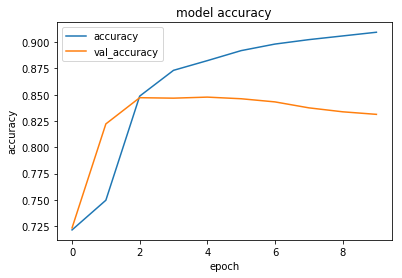

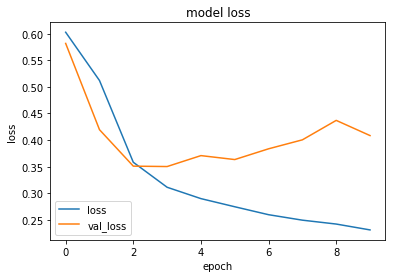

In [56]:
fig = plt.figure()
plt.plot(lstm_history.history['accuracy'])
plt.plot(lstm_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['accuracy', 'val_accuracy'], loc='upper left')
plt.show()
plt.plot(lstm_history.history['loss'])
plt.plot(lstm_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['loss', 'val_loss'], loc='lower left')
plt.show()

In [57]:
lstm_results

[0.42100316286087036, 0.8294649124145508]

# # CNN

In [58]:
max_features=5000
maxlen=400
batch_size=32
embedding_dims=50
filters=250
kernel_size=3
hidden_dims=250
epochs=2
num_words=10000
max_length=80

In [59]:
Drop=keras.layers.Dropout(0.2)(Embedding)
Con1d=keras.layers.Conv1D(filters,kernel_size,padding='valid',activation='relu',strides=1)(Drop)
GM1D=tf.keras.layers.GlobalMaxPooling1D()(Con1d)
GM1D_Dense=keras.layers.Dense(hidden_dims)(GM1D)
GM1D_Drop=keras.layers.Dropout(0.2)(GM1D_Dense)
GM1D_act=keras.layers.Activation('relu')(GM1D_Drop)
GM1D_Dense_act=keras.layers.Dense(1)(GM1D_act)
cnn_output=keras.layers.Activation('sigmoid')(GM1D_Dense_act)
cnn_model=keras.Model(INPUT,cnn_output)
cnn_model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [60]:
cnn_history=cnn_model.fit(tf.convert_to_tensor(postext),np.array(y_numeric),epochs=10,batch_size=512,validation_split=0.2,verbose=2)

Epoch 1/10
71/71 - 11s - val_loss: 0.4354 - loss: 0.4291 - val_accuracy: 0.8059 - accuracy: 0.7956
Epoch 2/10
71/71 - 11s - val_loss: 0.4362 - loss: 0.3061 - val_accuracy: 0.8109 - accuracy: 0.8697
Epoch 3/10
71/71 - 10s - val_loss: 0.4511 - loss: 0.2787 - val_accuracy: 0.8161 - accuracy: 0.8842
Epoch 4/10
71/71 - 10s - val_loss: 0.4537 - loss: 0.2569 - val_accuracy: 0.8154 - accuracy: 0.8952
Epoch 5/10
71/71 - 10s - val_loss: 0.4562 - loss: 0.2390 - val_accuracy: 0.8120 - accuracy: 0.9050
Epoch 6/10
71/71 - 10s - val_loss: 0.4703 - loss: 0.2218 - val_accuracy: 0.8111 - accuracy: 0.9132
Epoch 7/10
71/71 - 10s - val_loss: 0.4818 - loss: 0.2080 - val_accuracy: 0.8173 - accuracy: 0.9199
Epoch 8/10
71/71 - 10s - val_loss: 0.5055 - loss: 0.1947 - val_accuracy: 0.8162 - accuracy: 0.9255
Epoch 9/10
71/71 - 10s - val_loss: 0.5130 - loss: 0.1793 - val_accuracy: 0.8118 - accuracy: 0.9338
Epoch 10/10
71/71 - 10s - val_loss: 0.5408 - loss: 0.1712 - val_accuracy: 0.8138 - accuracy: 0.9367


In [61]:
cnn_results=cnn_model.evaluate(tf.convert_to_tensor(test_postext),np.array(y_test_numeric),verbose=0)

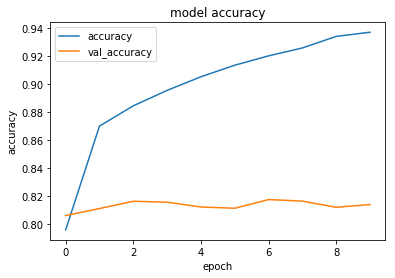

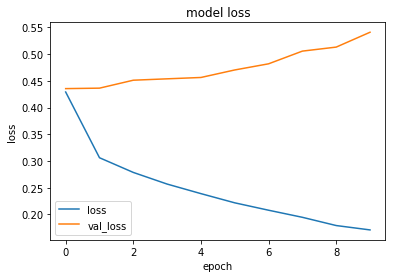

In [62]:
fig = plt.figure()
plt.plot(cnn_history.history['accuracy'])
plt.plot(cnn_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['accuracy', 'val_accuracy'], loc='upper left')
plt.show()
plt.plot(cnn_history.history['loss'])
plt.plot(cnn_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['loss', 'val_loss'], loc='lower left')
plt.show()

In [63]:
cnn_results

[0.5362302660942078, 0.8084691762924194]